<a href="https://colab.research.google.com/github/shaikzohebahmed/Airbnb-Bookings-Analysis---Capstone-Project/blob/main/Airbnb_Bookings_Analysis_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## <b> Since 2008, guests and hosts have used Airbnb to expand on traveling possibilities and present a more unique, personalized way of experiencing the world. Today, Airbnb became one of a kind service that is used and recognized by the whole world. Data analysis on millions of listings provided through Airbnb is a crucial factor for the company. These millions of listings generate a lot of data - data that can be analyzed and used for security, business decisions, understanding of customers' and providers' (hosts) behavior and performance on the platform, guiding marketing initiatives, implementation of innovative additional services and much more. </b>

## <b>This dataset has around 49,000 observations in it with 16 columns and it is a mix between categorical and numeric values. </b>

## <b> Explore and analyze the data to discover key understandings (not limited to these) such as : 
* What can we learn about different hosts and areas?
* What can we learn from predictions? (ex: locations, prices, reviews, etc)
* Which hosts are the busiest and why?
* Is there any noticeable difference of traffic among different areas and what could be the reason for it? </b>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
file_path = "/content/drive/MyDrive/Almabetter/AirBnB Booking Analysis/"
airbnb_df = pd.read_csv(file_path+"Airbnb NYC 2019.csv")

In [4]:
# Total number of rows and columns in dataset 
airbnb_df.shape

(48895, 16)

In [5]:
# checking the basic information of dataset
airbnb_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

In [6]:
# List of column names of the dataset
airbnb_df.columns

Index(['id', 'name', 'host_id', 'host_name', 'neighbourhood_group',
       'neighbourhood', 'latitude', 'longitude', 'room_type', 'price',
       'minimum_nights', 'number_of_reviews', 'last_review',
       'reviews_per_month', 'calculated_host_listings_count',
       'availability_365'],
      dtype='object')

In [7]:
# count the number of missing values in each column
airbnb_df.isna().sum()

id                                    0
name                                 16
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

 * The highest missing value is in reviews_per_month and last_reviews column, I thing this becz most of people don't write the reviews.host_name and name also have the missing value this may be becz of some technical issue.
* We can handle the missing value in review_per_month by default value.
* We can handle the missing value in name and host_name only by droping them.

In [8]:
# Filling the missing value in reviews_per_month  with default value 0 (0 reviews) 
airbnb_df['reviews_per_month'].fillna(0,inplace=True)

In [9]:
#Drop unecessary attributes which is not relevant to book a room: id, host_name,name and last_review
airbnb_df.drop(['id','name','host_name','last_review'],axis=1,inplace=True)

In [10]:
# Droping rows which is have null values 
airbnb_df.dropna(inplace=True)

In [11]:
airbnb_df.isnull().sum(),airbnb_df.shape

(host_id                           0
 neighbourhood_group               0
 neighbourhood                     0
 latitude                          0
 longitude                         0
 room_type                         0
 price                             0
 minimum_nights                    0
 number_of_reviews                 0
 reviews_per_month                 0
 calculated_host_listings_count    0
 availability_365                  0
 dtype: int64, (48895, 12))

* There is no missing values in dataset now.

In [12]:
# First 5 rows
airbnb_df.head()

,host_id,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
0,2787,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,0.21,6,365
1,2845,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,0.38,2,355
2,4632,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,0.00,1,365
3,4869,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,4.64,1,194
4,7192,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,0.10,1,0


In [13]:
# Last 5 rows
airbnb_df.tail()

,host_id,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
48890,8232441,Brooklyn,Bedford-Stuyvesant,40.67853,-73.94995,Private room,70,2,0,0.0,2,9
48891,6570630,Brooklyn,Bushwick,40.70184,-73.93317,Private room,40,4,0,0.0,2,36
48892,23492952,Manhattan,Harlem,40.81475,-73.94867,Entire home/apt,115,10,0,0.0,1,27
48893,30985759,Manhattan,Hell's Kitchen,40.75751,-73.99112,Shared room,55,1,0,0.0,6,2
48894,68119814,Manhattan,Hell's Kitchen,40.76404,-73.98933,Private room,90,7,0,0.0,1,23


In [14]:
# Getting the basic statistics analysis of the overall dataset
airbnb_df.describe()

,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,4.889500e+04,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000
mean,6.762001e+07,40.728949,-73.952170,152.720687,7.029962,23.274466,1.090910,7.143982,112.781327
std,7.861097e+07,0.054530,0.046157,240.154170,20.510550,44.550582,1.597283,32.952519,131.622289
min,2.438000e+03,40.499790,-74.244420,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000
25%,7.822033e+06,40.690100,-73.983070,69.000000,1.000000,1.000000,0.040000,1.000000,0.000000
50%,3.079382e+07,40.723070,-73.955680,106.000000,3.000000,5.000000,0.370000,1.000000,45.000000
75%,1.074344e+08,40.763115,-73.936275,175.000000,5.000000,24.000000,1.580000,2.000000,227.000000
max,2.743213e+08,40.913060,-73.712990,10000.000000,1250.000000,629.000000,58.500000,327.000000,365.000000


* The average price in NYC is 152 dollar and median price is 106 dollar.

In [15]:
# Number of Airbnb in neighbourhood group
neighbourhood_group_count = pd.DataFrame(airbnb_df.groupby('neighbourhood_group')['neighbourhood'].count())

In [16]:
neighbourhood_group_count

,neighbourhood
neighbourhood_group,
Bronx,1091
Brooklyn,20104
Manhattan,21661
Queens,5666
Staten Island,373


Text(0, 0.5, 'Count of Airbnb')

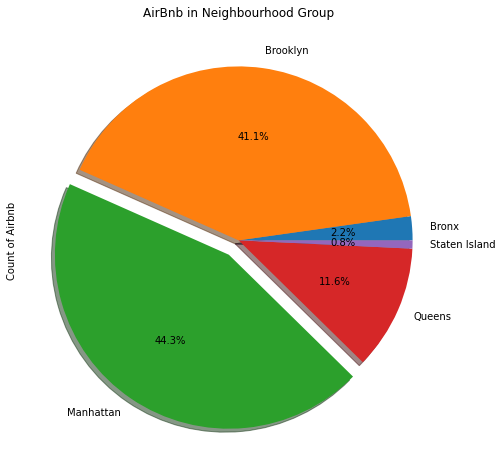

In [17]:
#Pie chart of different neighbourhood_group by count
ax = neighbourhood_group_count.plot.pie(y='neighbourhood', explode=[0,0,0.1,0,0],autopct='%1.1f%%', legend = False, title='AirBnb in Neighbourhood Group',shadow=True, figsize=(18,8))
ax.set_ylabel('Count of Airbnb')

* 85% of airbnb are distrubute in manhattan and brooklyn where as other very less airbnb locations.
* Most of the people stay in manhattan and brooklyn

In [18]:
# Number of AirBnb in different neighbourhood
no_neighbourhood = airbnb_df.groupby(['neighbourhood',])['host_id'].count().reset_index().sort_values('host_id',ascending=False,ignore_index=True).head(15)

In [19]:
no_neighbourhood

,neighbourhood,host_id
0,Williamsburg,3920
1,Bedford-Stuyvesant,3714
2,Harlem,2658
3,Bushwick,2465
4,Upper West Side,1971
5,Hell's Kitchen,1958
6,East Village,1853
7,Upper East Side,1798
8,Crown Heights,1564
9,Midtown,1545


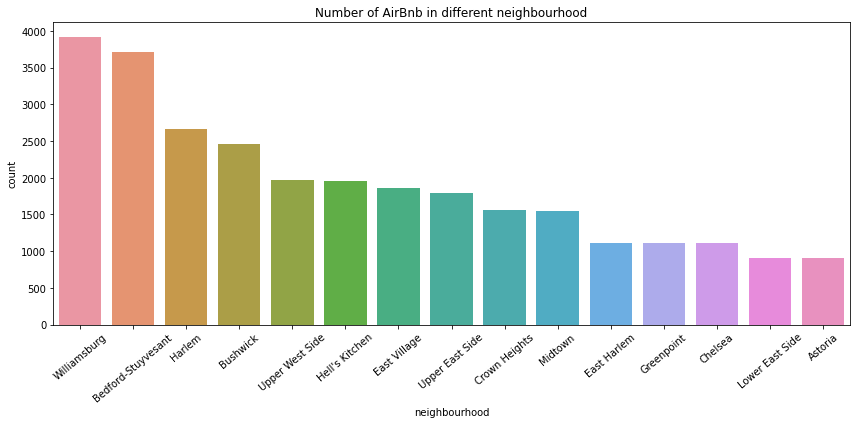

In [20]:
# Barplot of different neighbourhood
plt.rcParams['figure.figsize'] = (12, 6)

ax = sns.barplot(x="neighbourhood", y="host_id", data=no_neighbourhood,)
plt.title('Number of AirBnb in different neighbourhood')
ax.set(xlabel="neighbourhood", ylabel = "count")
plt.xticks(rotation=40)
plt.tight_layout()

* Most of the airbnb location are available in this top 15 neighbourhood and people prefer to stay here.
* The top 2 neighbourhood which is most prefer by people is   Williamsburg	and Bedford-Stuyvesant.

In [21]:
#Average price of AirBnb in different neighbourhood_group 
neighbourhood_group_avgprice = airbnb_df.groupby('neighbourhood_group')['price'].mean().reset_index().sort_values('price',ascending=False,ignore_index=True)

In [22]:
neighbourhood_group_avgprice

,neighbourhood_group,price
0,Manhattan,196.875814
1,Brooklyn,124.383207
2,Staten Island,114.812332
3,Queens,99.517649
4,Bronx,87.496792


Text(0.5, 1.0, 'Average Price of Airbnb in different neighbourhood group')

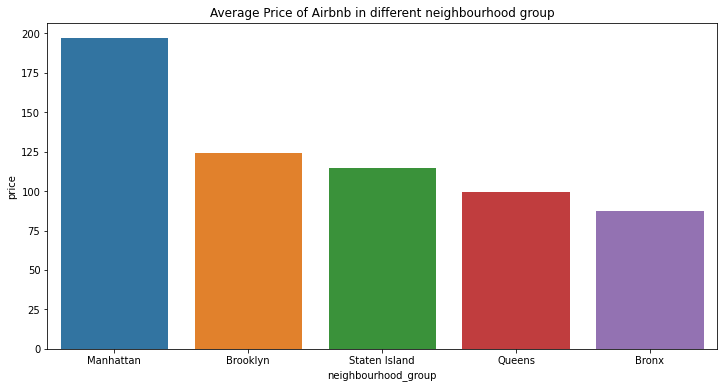

In [23]:
sns.barplot(x="neighbourhood_group", y="price", data=neighbourhood_group_avgprice)
plt.title('Average Price of Airbnb in different neighbourhood group')

* location wise distribution of price shows that Manhattan has expensive and Bronx has low priced rooms


In [24]:
#Average price of AirBnb in different neighbourhood
neighbourhood_avgprice = airbnb_df.groupby('neighbourhood')['price'].mean().reset_index().sort_values('price',ascending=False,ignore_index=True).head(15)

In [25]:
neighbourhood_avgprice

,neighbourhood,price
0,Fort Wadsworth,800.000000
1,Woodrow,700.000000
2,Tribeca,490.638418
3,Sea Gate,487.857143
4,Riverdale,442.090909
5,Prince's Bay,409.500000
6,Battery Park City,367.557143
7,Flatiron District,341.925000
8,Randall Manor,336.000000
9,NoHo,295.717949


Text(0.5, 1.0, 'Average Price of Airbnb in different neighbourhood')

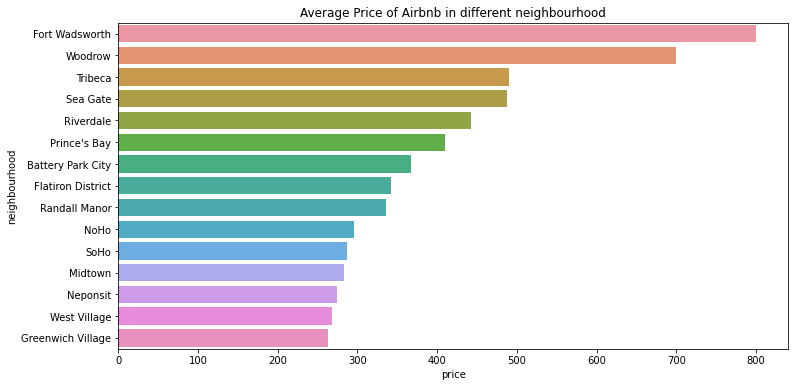

In [26]:
sns.barplot(x='price', y='neighbourhood', data=neighbourhood_avgprice)
plt.title('Average Price of Airbnb in different neighbourhood')

* Most expensive neighbourhood is  fort wadsworth followed by woodrow then tribeca.


In [27]:
# Count of different room_type
room_type_count = pd.DataFrame(airbnb_df.groupby('room_type')['host_id'].count())

In [28]:
room_type_count

,host_id
room_type,
Entire home/apt,25409
Private room,22326
Shared room,1160


[Text(0, 0.5, 'count')]

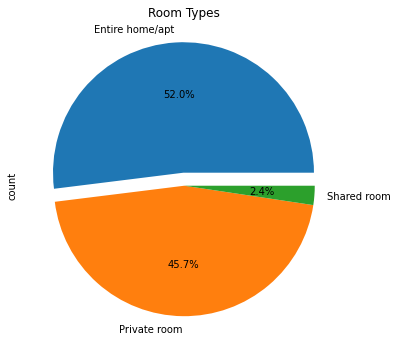

In [29]:
ax = room_type_count.plot.pie(y='host_id', autopct='%1.1f%%',explode=[0.1,0,0,], legend = False, figsize=(18,6))
plt.title('Room Types')
ax.set(ylabel = "count")

* The demand of entire home and private room is more high and people also choose entire home and private room.
* As per the dataset 90% of them are entire home or private room and only 2.4% of them are share room 

In [30]:
# Average price of AirBnb based on room_type 
room_type_avgprice = airbnb_df.groupby('room_type')['price'].mean().reset_index().sort_values('price',ascending=False,ignore_index=True)

In [31]:
room_type_avgprice

,room_type,price
0,Entire home/apt,211.794246
1,Private room,89.780973
2,Shared room,70.127586


Text(0.5, 0, 'price')

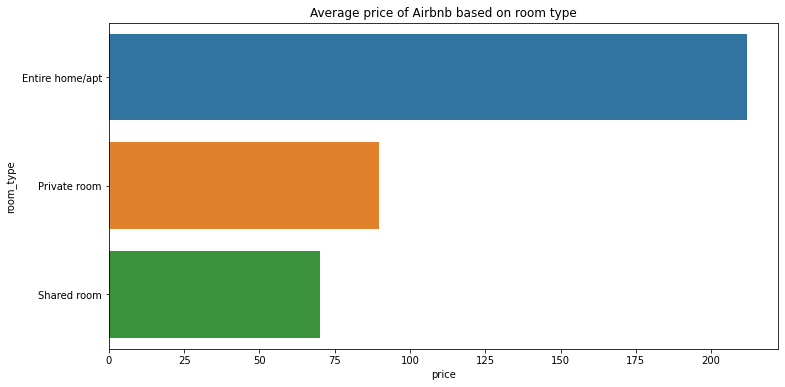

In [32]:
ax = sns.barplot(x='price', y='room_type', data=room_type_avgprice)
plt.title('Average price of Airbnb based on room type')
ax.set_xlabel('price')

* Most expensive room type is entire home followed by private and share room.
* If you opt for private room you have to pay 50% less then entire home.

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


Text(0.5, 0, 'Price')

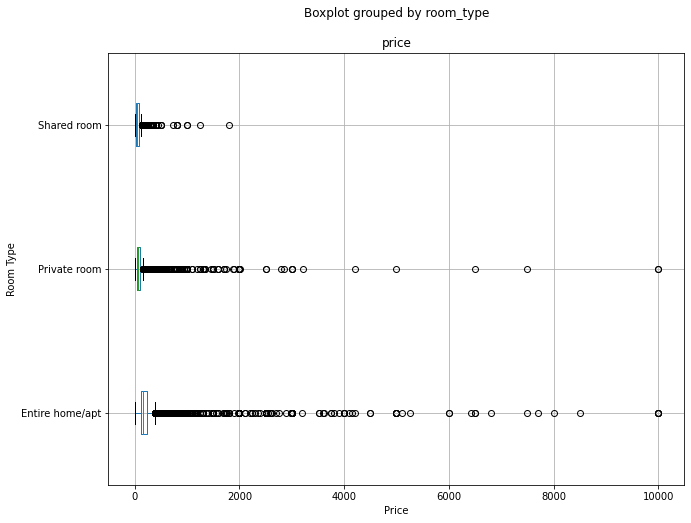

In [33]:
# Box plot to see price range for different types of rooms

ax=airbnb_df.boxplot(column='price', by='room_type', figsize=(10, 8),vert=False)
ax.set_ylabel('Room Type')
ax.set_xlabel('Price')

* The box plot above helps to visualize the price distribution according to the room type.
* For all the rooms, most rooms are in the price range of below `$2000`.
* Private room and Entire home/apt have outliers with both of them having rooms which cost `$10,000`.

In [34]:
# Combining neighbourhood group with room_type
ng_roomtype = airbnb_df.groupby(['neighbourhood_group','room_type'])['host_id'].count().reset_index().head(15)

In [35]:
ng_roomtype

,neighbourhood_group,room_type,host_id
0,Bronx,Entire home/apt,379
1,Bronx,Private room,652
2,Bronx,Shared room,60
3,Brooklyn,Entire home/apt,9559
4,Brooklyn,Private room,10132
5,Brooklyn,Shared room,413
6,Manhattan,Entire home/apt,13199
7,Manhattan,Private room,7982
8,Manhattan,Shared room,480
9,Queens,Entire home/apt,2096


(array([0, 1, 2, 3, 4]), <a list of 5 Text major ticklabel objects>)

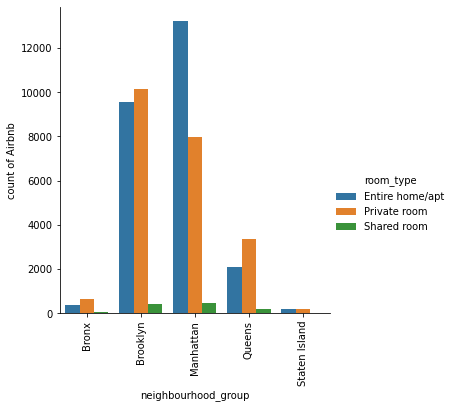

In [36]:
# Different neighbourhood group and room type
ax = sns.catplot(
    data=ng_roomtype, kind="bar",
    x="neighbourhood_group", y="host_id", hue="room_type"
)
ax.set(ylabel = "count of Airbnb")
plt.xticks(rotation=90)

* The demand of entire home is more in manhattan followed by 
brooklyn.
* Demand of private room is more in brooklyn followed by manhattan.

In [37]:
# Combining neighbourhood group with room_type with price
ng_roomtype_price = airbnb_df.groupby(['neighbourhood_group','room_type'])['price'].mean().unstack()

In [38]:
ng_roomtype_price

room_type,Entire home/apt,Private room,Shared room
neighbourhood_group,,,
Bronx,127.506596,66.788344,59.800000
Brooklyn,178.327545,76.500099,50.527845
Manhattan,249.239109,116.776622,88.977083
Queens,147.050573,71.762456,69.020202
Staten Island,173.846591,62.292553,57.444444


Text(0.5, 1.0, 'Average price of a room according to the neighbourhood group')

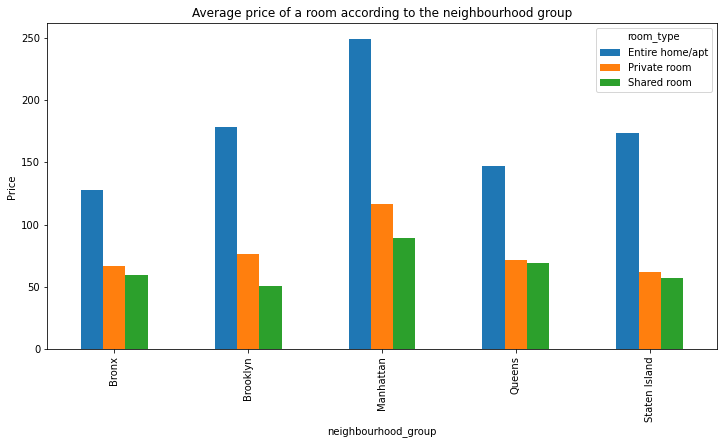

In [39]:
# Different neighbourhood group, room type and average price
ax = ng_roomtype_price.plot(kind = "bar")
ax.set_ylabel('Price')

plt.title('Average price of a room according to the neighbourhood group')

* Manhattan has the highest price for room types with Entire home/apt ranging to nearly 249USD/night, followed by Private room with 117 USD/night.And it’s obvious being the most expensive place to live in!
* In manhattan you opt for entire home 40% more amount then opt entire home in brooklyn.


In [40]:
#Minimum nights guest stay at an AirBnb
min_night_count = airbnb_df.groupby('minimum_nights')['host_id'].count().reset_index().head(20)

In [41]:
min_night_count 

,minimum_nights,host_id
0,1,12720
1,2,11696
2,3,7999
3,4,3303
4,5,3034
5,6,752
6,7,2058
7,8,130
8,9,80
9,10,483


[Text(0, 0.5, 'count')]

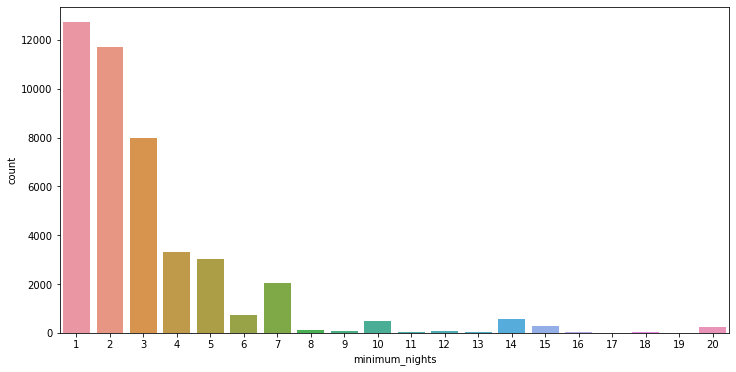

In [42]:
ax = sns.barplot(x="minimum_nights", y="host_id", data=min_night_count)
ax.set(ylabel='count')

* Most of people prefer to stay for one or two nights only 

In [43]:
# Average reviews Airbnb in different neighbourhood group
ng_numRev = airbnb_df.groupby(['neighbourhood_group'])['number_of_reviews'].median().reset_index().sort_values('number_of_reviews',ascending=False,ignore_index=True)

In [44]:
ng_numRev

,neighbourhood_group,number_of_reviews
0,Staten Island,12
1,Bronx,9
2,Queens,7
3,Brooklyn,6
4,Manhattan,4


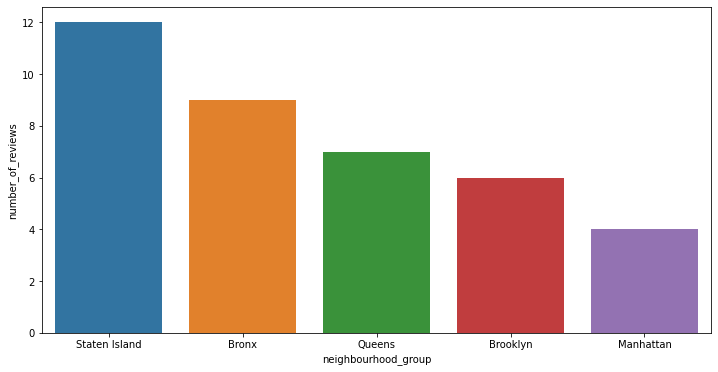

In [45]:
sns.barplot(x='neighbourhood_group',y='number_of_reviews',data=ng_numRev)

* The most reviews neighbourhood group is stated island with average reviews of 12, followed by Bronx with average reviews of 9 then Queens with average reviews of 7.

In [46]:
# Average reviews of Airbnb in different neighbourhood
neighbourhood_numRev = airbnb_df.groupby(['neighbourhood'])['number_of_reviews'].median().reset_index().sort_values('number_of_reviews',ascending=False,ignore_index=True).head(15)

In [47]:
neighbourhood_numRev

,neighbourhood,number_of_reviews
0,Silver Lake,118.5
1,Eltingville,83.0
2,Richmondtown,79.0
3,Manhattan Beach,50.0
4,East Morrisania,40.5
5,Lighthouse Hill,39.0
6,Pelham Gardens,38.5
7,Dyker Heights,37.0
8,Graniteville,36.0
9,Highbridge,32.0


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14]),
 <a list of 15 Text major ticklabel objects>)

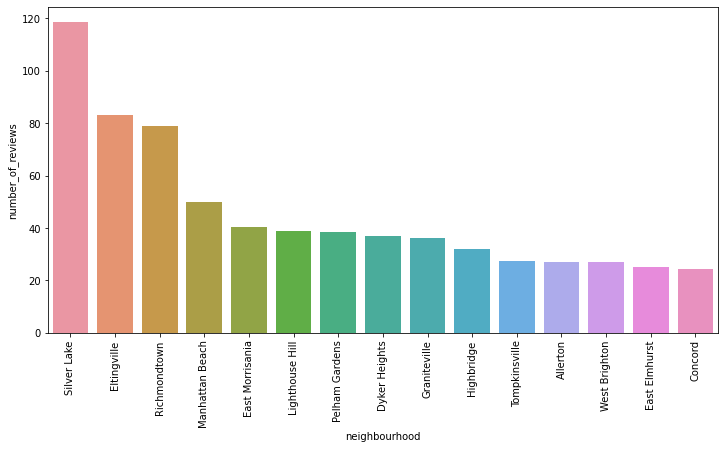

In [48]:
sns.barplot(x='neighbourhood',y='number_of_reviews',data=neighbourhood_numRev)
plt.xticks(rotation=90)

* The most review neighbourhood is silver lake with average reviews of 185 per month, followed by Eltingville with average review of 83

Text(0.5, 1.0, 'Top hosts on AIRBNB in NYC')

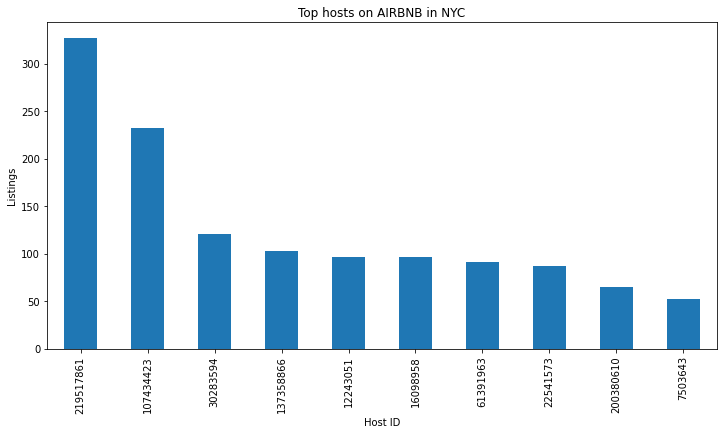

In [49]:
# Top 10 Most Popular Airbnb Hosts
dfhost =airbnb_df.host_id.value_counts()[:10]

ax = dfhost.plot(kind='bar')
ax.set_xlabel('Host ID')
ax.set_ylabel('Listings')
ax.set_title("Top hosts on AIRBNB in NYC")

* The bar graph shows top 10 hosts in an descending order based on their number of listings. The host with ID 219517861 is the top host from the dataset with more than 300 listings.

In [50]:
# Top 10 reviewed hosts 
top_reviewed_host = airbnb_df.groupby('host_id')['reviews_per_month'].max().reset_index().sort_values('reviews_per_month',ascending=False,ignore_index=True).head(10)

In [51]:
top_reviewed_host

,host_id,reviews_per_month
0,244361589,58.50
1,228415932,20.94
2,156684502,19.75
3,26432133,16.22
4,217379941,15.78
5,232251881,15.32
6,47621202,14.58
7,266992480,14.00
8,259630588,14.00
9,55125246,13.48


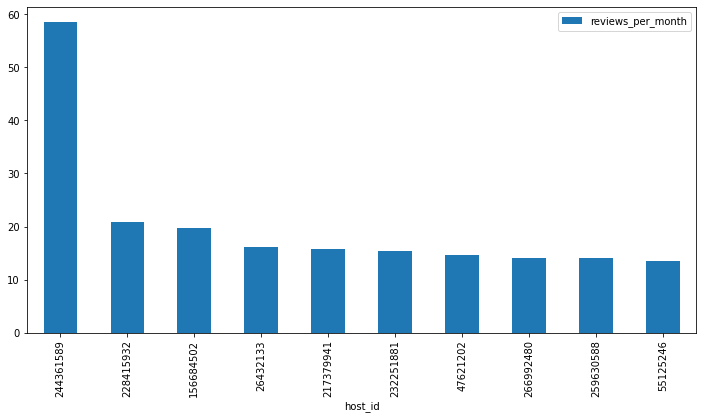

In [52]:
top_reviewed_host.plot(x='host_id',y='reviews_per_month',kind='bar')

* The bar graph shows top 10 hosts in an descending order based on their number of reviews/month. The host with ID 244361589	is the top host from the dataset around 60 reviews/month.

In [65]:
# Correlation Matrix of Attributes
corr_df  = airbnb_df.corr()

Text(0.5, 1.0, 'Correlation Matrix of Attributes')

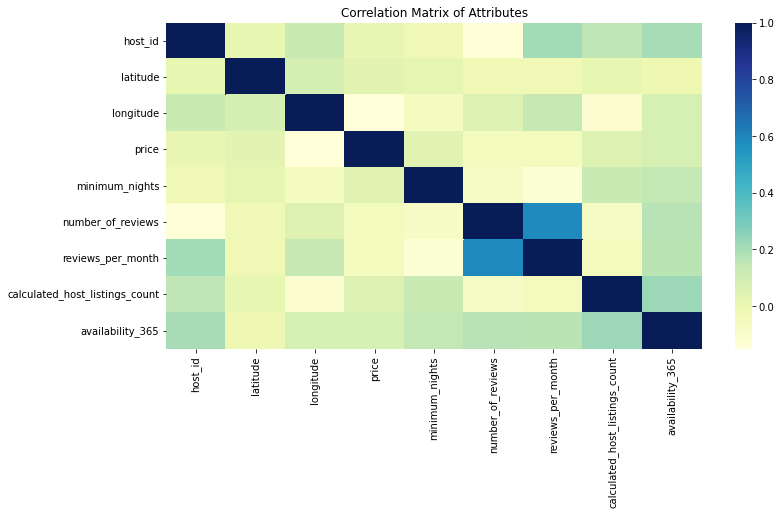

In [66]:
ax = sns.heatmap(corr_df,cmap="YlGnBu")

ax.set_title('Correlation Matrix of Attributes')

* Highest Correlation is between.
* reviews_per_month and number_of_reviews: 0.589407
* There is no strong correlation among the numeric variables.

# Conclusion

1. Manhattan is most expensive and popular neighbourhood group amoung the listing followed by brooklyn.
2 . Bronx is cheapest neighbourhood group amoung the listing followed by Queens.
3. Most of people stay in neighbourhood is williamsburg amoung other followed by bedford stuyvesant.
4. Most expensive neighbourhood is fort wadsworth amoung other followed by woodrow.
5. As per data 90% of room type are entire home or private room and only 2.4% of share room.
6.Most demanded and expensive room type are entire home followed by Private and Shared rooms.
7.If you opt for private room you have to pay 50% less then entire home.
8.Manhattan has higher number of Entire Home and Shared room listings. Brooklyn has higher private room bookings.
9.Most of rooms are in the price range of below $2000.
10. Most number of reviews are collected from the neighborhood of Brooklyn. 
11. There is no strong correlation among the numeric variables.

